In [100]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Generate Cities List

In [101]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

In [102]:
cities

['castro',
 'mataura',
 'illoqqortoormiut',
 'punta arenas',
 'thompson',
 'guerrero negro',
 'dolbeau',
 'banda aceh',
 'albany',
 'yulara',
 'constitucion',
 'guadalupe y calvo',
 'rikitea',
 'lompoc',
 'moroto',
 'nizhneyansk',
 'ilulissat',
 'taolanaro',
 'tabiauea',
 'barrow',
 'miri',
 'manggar',
 'ushuaia',
 'malim',
 'dorogobuzh',
 'puerto ayora',
 'upernavik',
 'mahebourg',
 'east london',
 'yar-sale',
 'hirara',
 'new norfolk',
 'hamilton',
 'rocha',
 'bubaque',
 'bambous virieux',
 'avarua',
 'qaanaaq',
 'puerto escondido',
 'nara',
 'saint-georges',
 'san jeronimo',
 'xining',
 'campina verde',
 'hermanus',
 'george',
 'sentyabrskiy',
 'puerto el triunfo',
 'mareeba',
 'vila velha',
 'busselton',
 'douala',
 'aksu',
 'cape town',
 'butaritari',
 'umm kaddadah',
 'jamestown',
 'faya',
 'saskylakh',
 'malakal',
 'zakamensk',
 'kvarkeno',
 'skagastrond',
 'naze',
 'kapaa',
 'honningsvag',
 'kazalinsk',
 'vaini',
 'eenhana',
 'bontang',
 'redcliffe',
 'coromandel',
 'port alfre

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [103]:
api_key=weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [104]:
city_name=[]
lat=[]
lng=[]
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]

count=1

print(f'Beggining Data Retrival')
print(f'*************************************')

for city in cities:
    try:
        cities_data=(requests.get(f'{url}&q={city}').json())
        city_name.append(cities_data["name"])
        lat.append(cities_data["coord"]["lat"])
        lng.append(cities_data["coord"]["lon"])
        max_temp.append(cities_data["main"]["temp"])  
        humidity.append(cities_data["main"]["humidity"]) 
        cloudiness.append(cities_data["clouds"]["all"])             
        wind_speed.append(cities_data["wind"]["speed"])
        
        print(f'City {count} of {len(cities)} | {city}') 
        
        count = count + 1
        
    except KeyError:
        print(f'City {count} not found, skipping...')
        count = count + 1            

print('Data Retrival Complete')
print('***************************************')                    

Beggining Data Retrival
*************************************
City 1 of 604 | castro
City 2 of 604 | mataura
City 3 not found, skipping...
City 4 of 604 | punta arenas
City 5 of 604 | thompson
City 6 of 604 | guerrero negro
City 7 not found, skipping...
City 8 of 604 | banda aceh
City 9 of 604 | albany
City 10 of 604 | yulara
City 11 of 604 | constitucion
City 12 of 604 | guadalupe y calvo
City 13 of 604 | rikitea
City 14 of 604 | lompoc
City 15 of 604 | moroto
City 16 not found, skipping...
City 17 of 604 | ilulissat
City 18 not found, skipping...
City 19 not found, skipping...
City 20 of 604 | barrow
City 21 of 604 | miri
City 22 of 604 | manggar
City 23 of 604 | ushuaia
City 24 of 604 | malim
City 25 of 604 | dorogobuzh
City 26 of 604 | puerto ayora
City 27 of 604 | upernavik
City 28 of 604 | mahebourg
City 29 of 604 | east london
City 30 of 604 | yar-sale
City 31 of 604 | hirara
City 32 of 604 | new norfolk
City 33 of 604 | hamilton
City 34 of 604 | rocha
City 35 of 604 | bubaque
C

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [105]:
cities_data_df=pd.DataFrame({'City': city_name,
                            'Lat': lat,
                            'Lng': lng,
                            'Max Temp': max_temp,
                            'Humidity': humidity,
                            'Cloudiness': cloudiness,
                            'Wind Speed': wind_speed})

pd.DataFrame.to_csv(cities_data_df,'cities_data.csv')
cities_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Castro,-24.7911,-50.0119,51.82,91,0,5.39
1,Mataura,-46.1927,168.8643,72.39,57,97,0.81
2,Punta Arenas,-53.1500,-70.9167,59.00,44,90,4.61
3,Thompson,55.7435,-97.8558,-25.60,62,90,14.97
4,Guerrero Negro,27.9769,-114.0611,59.54,77,0,8.08


In [106]:
cities_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000
mean,18.619734,18.726192,50.522509,72.063177,53.088448,8.797022
std,33.643794,90.272514,32.659288,19.834979,37.907346,6.304305
min,-54.800000,-179.166700,-38.200000,15.000000,0.000000,0.130000
25%,-8.744825,-59.845825,28.485000,62.000000,17.000000,4.470000
50%,21.033350,18.257700,63.165000,76.000000,57.500000,6.910000
75%,48.164500,101.482725,76.822500,87.000000,90.000000,12.357500
max,78.218600,178.416700,98.600000,100.000000,100.000000,40.290000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [108]:
cleaned_cities_df=cities_data_df.loc[cities_data_df["Humidity"]<=100]
cleaned_cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Castro,-24.7911,-50.0119,51.82,91,0,5.39
1,Mataura,-46.1927,168.8643,72.39,57,97,0.81
2,Punta Arenas,-53.1500,-70.9167,59.00,44,90,4.61
3,Thompson,55.7435,-97.8558,-25.60,62,90,14.97
4,Guerrero Negro,27.9769,-114.0611,59.54,77,0,8.08


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

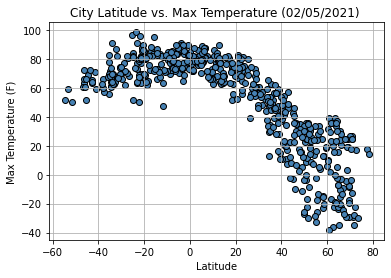

In [109]:
plt.scatter(cleaned_cities_df['Lat'], cleaned_cities_df['Max Temp']
,edgecolors="black",facecolors="steelblue")
plt.title(f'City Latitude vs. Max Temperature (02/05/2021) ')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)
plt.savefig('lat_temp.png')

## Latitude vs. Humidity Plot

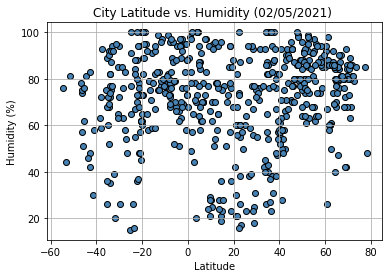

In [110]:
plt.scatter(cleaned_cities_df['Lat'], cleaned_cities_df['Humidity']
,edgecolors="black",facecolors="steelblue")
plt.title(f'City Latitude vs. Humidity (02/05/2021) ')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.savefig('lat_temp.png')

## Latitude vs. Cloudiness Plot

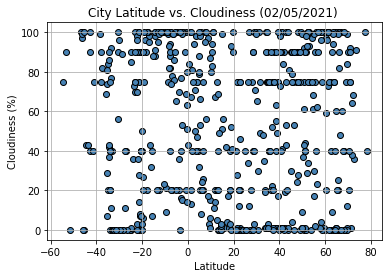

In [111]:
plt.scatter(cleaned_cities_df['Lat'], cleaned_cities_df['Cloudiness']
,edgecolors="black",facecolors="steelblue")
plt.title(f'City Latitude vs. Cloudiness (02/05/2021) ')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.savefig('lat_temp.png')

## Latitude vs. Wind Speed Plot

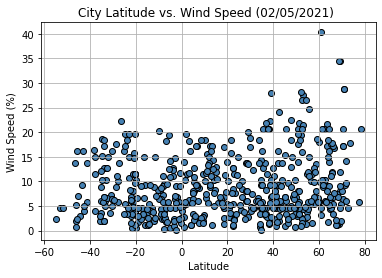

In [112]:
plt.scatter(cleaned_cities_df['Lat'], cleaned_cities_df['Wind Speed']
,edgecolors="black",facecolors="steelblue")
plt.title(f'City Latitude vs. Wind Speed (02/05/2021) ')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')
plt.grid(True)
plt.savefig('lat_temp.png')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [113]:
from scipy.stats import linregress

In [114]:
north_df = cleaned_cities_df.loc[pd.to_numeric(cleaned_cities_df["Lat"]).astype(float)>0,:]
south_df = cleaned_cities_df.loc[pd.to_numeric(cleaned_cities_df["Lat"]).astype(float)<0,:]


R-Value: -0.862551689431117


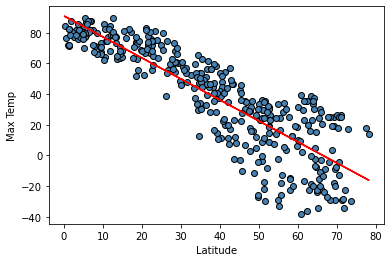

In [115]:
x_values = pd.to_numeric(north_df['Lat']).astype(float)
y_values = pd.to_numeric(north_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values,edgecolors="black",facecolors="steelblue")
plt.plot(x_values,regress_values,"red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"R-Value: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R-Value: 0.5230736253028424


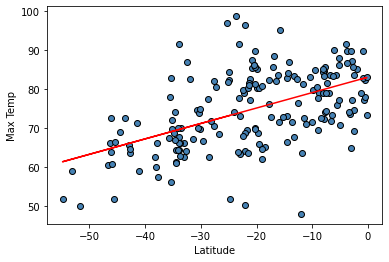

In [116]:
x_values = pd.to_numeric(south_df['Lat']).astype(float)
y_values = pd.to_numeric(south_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values,edgecolors="black",facecolors="steelblue")
plt.plot(x_values,regress_values,"red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"R-Value: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-Value: 0.240986362162959


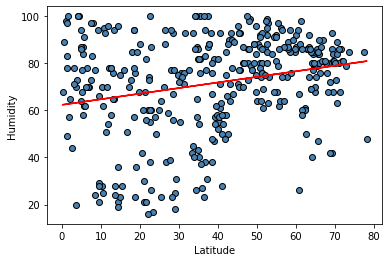

In [117]:
x_values = pd.to_numeric(north_df['Lat']).astype(float)
y_values = pd.to_numeric(north_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values,edgecolors="black",facecolors="steelblue")
plt.plot(x_values,regress_values,"red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"R-Value: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-Value: 0.28433688901298737


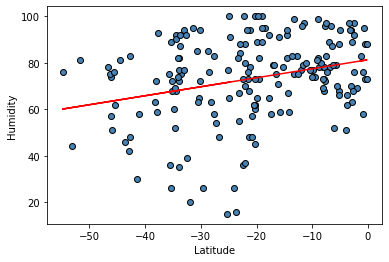

In [118]:
x_values = pd.to_numeric(south_df['Lat']).astype(float)
y_values = pd.to_numeric(south_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values,edgecolors="black",facecolors="steelblue")
plt.plot(x_values,regress_values,"red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"R-Value: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-Value: 0.07288433936615953


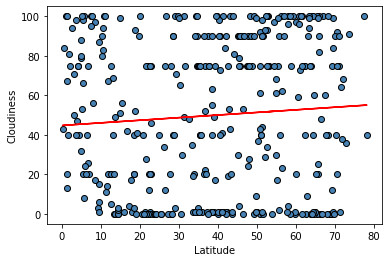

In [119]:
x_values = pd.to_numeric(north_df['Lat']).astype(float)
y_values = pd.to_numeric(north_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values,edgecolors="black",facecolors="steelblue")
plt.plot(x_values,regress_values,"red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"R-Value: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-Value: 0.1682319380653701


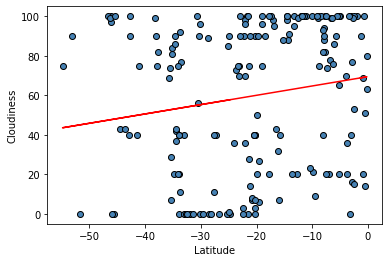

In [120]:
x_values = pd.to_numeric(south_df['Lat']).astype(float)
y_values = pd.to_numeric(south_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values,edgecolors="black",facecolors="steelblue")
plt.plot(x_values,regress_values,"red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"R-Value: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-Value: 0.17482088386962977


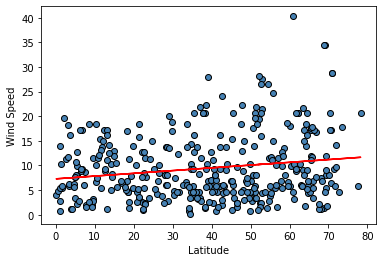

In [121]:
x_values = pd.to_numeric(north_df['Lat']).astype(float)
y_values = pd.to_numeric(north_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values,edgecolors="black",facecolors="steelblue")
plt.plot(x_values,regress_values,"red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"R-Value: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-Value: -0.11911839871665879


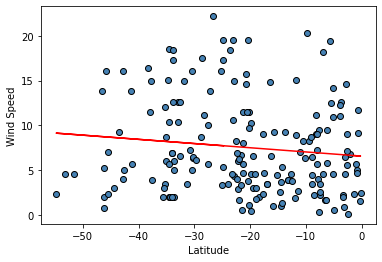

In [122]:
x_values = pd.to_numeric(south_df['Lat']).astype(float)
y_values = pd.to_numeric(south_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values,edgecolors="black",facecolors="steelblue")
plt.plot(x_values,regress_values,"red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"R-Value: {rvalue}")
plt.show()